### Author - Vaishnvee yede

### Task 3- Sales prediction using Python 

### Domain - Data Science

# Sales Prediction Using Python 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 1 . Load and inspect the data

In [2]:
df=pd.read_csv('D:/codesoft projects/archive (2)/advertising.csv', encoding='ISO-8859-1')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Step 2. Data Preprocessing 

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [13]:
df.duplicated().sum()

0

## Step 3 . Exploratory Data Analysis (EDA)

In [14]:
# Summary statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
# Correlation matrix
print("Correlation matrix :")
corr_matrix=df.corr()
print(corr_matrix)

Correlation matrix :
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


The correlation analysis showed that TV advertising has the strongest correlation with sales (0.901), while Radio has a moderate correlation (0.350), and Newspaper has the weakest correlation (0.158).

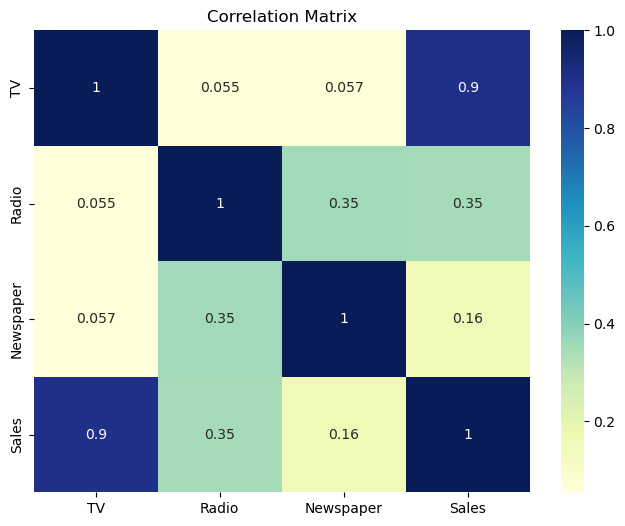

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

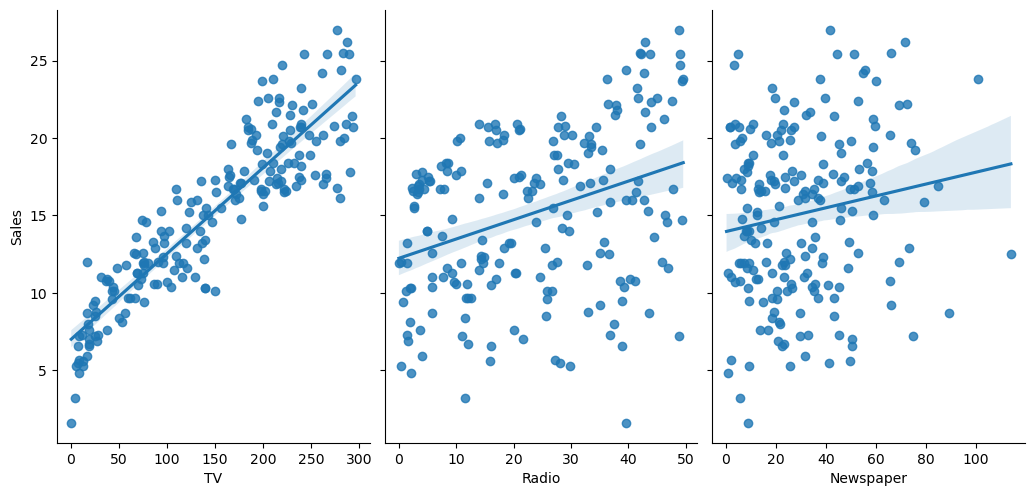

In [17]:
# Visualize the relationship between features and sales
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=5,aspect=0.7,kind='reg')
plt.show()

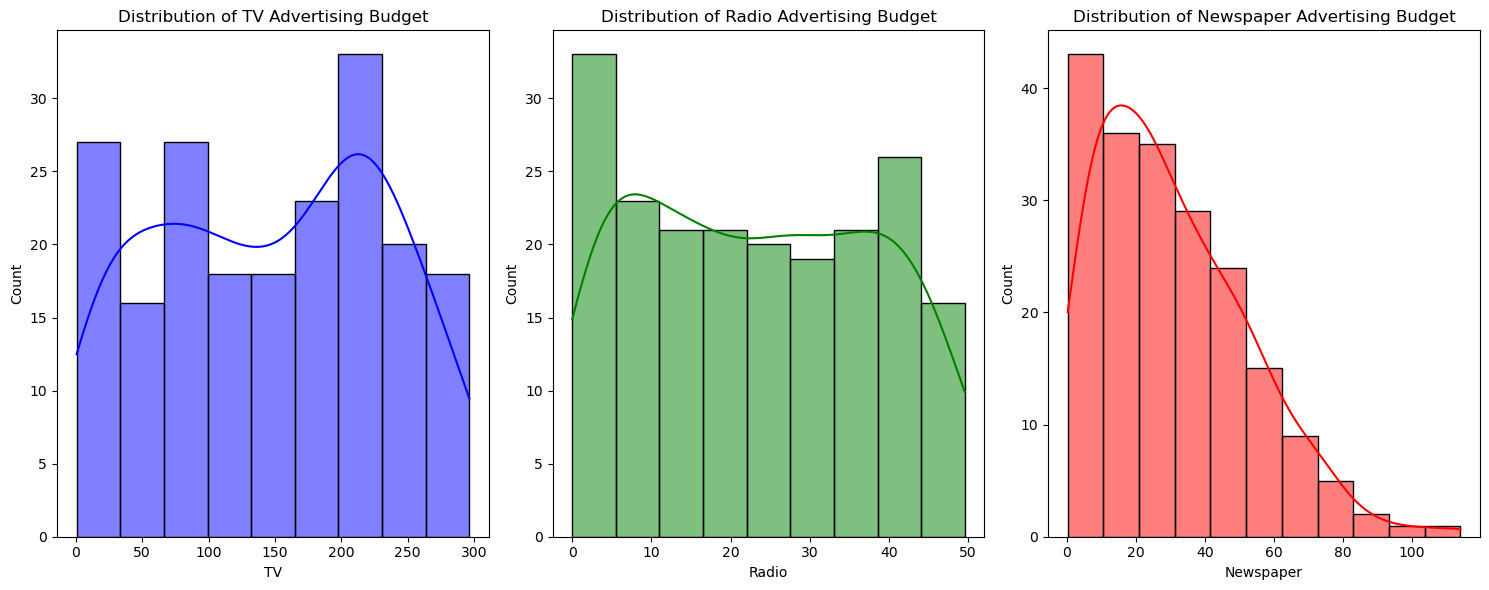

In [18]:
# Visualize the distribution of each feature
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='blue')
plt.title('Distribution of TV Advertising Budget')

plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='green')
plt.title('Distribution of Radio Advertising Budget')

plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='red')
plt.title('Distribution of Newspaper Advertising Budget')

plt.tight_layout()
plt.show()

In [19]:
# Create a categorical variable based on Sales for coloring
df['Sales_Category'] = pd.cut(df['Sales'], bins=3, labels=['Low', 'Medium', 'High'])

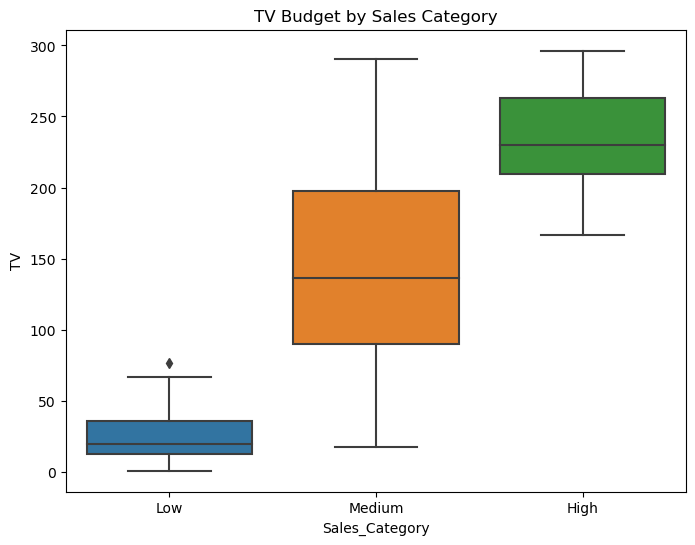

In [20]:
# Boxplot to understand the distribution of Sales based on each feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales_Category', y='TV', data=df)
plt.title('TV Budget by Sales Category')
plt.show()

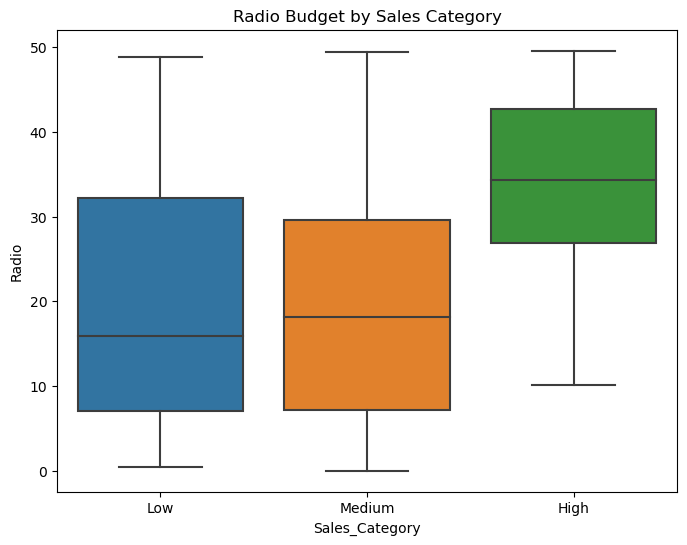

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales_Category', y='Radio', data=df)
plt.title('Radio Budget by Sales Category')
plt.show()

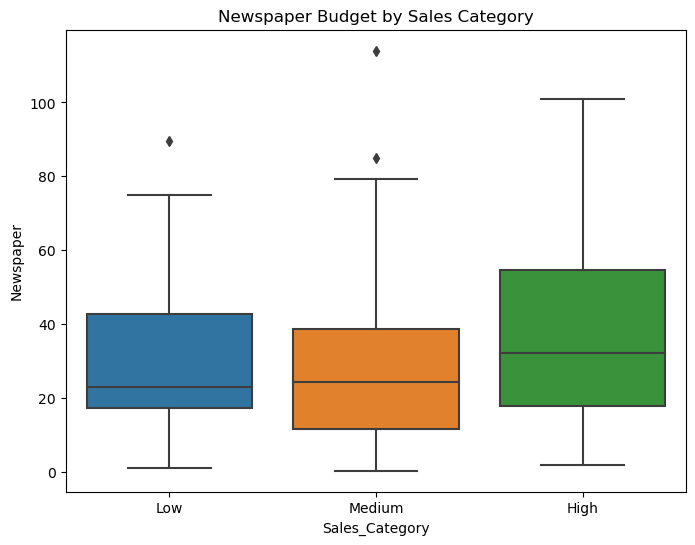

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sales_Category', y='Newspaper', data=df)
plt.title('Newspaper Budget by Sales Category')
plt.show()

## Step 4: Build and Train the Model

In [23]:
# Split the data into training and testing sets
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# Build a linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
# Predict sales on the test set
y_pred=model.predict(X_test)
print(y_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


## Step 5: Evaluate the Model

In [27]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [28]:
print("Model Evaluation :")
print(f"Mean Squared Errorn:{mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 score):{r2}")

Model Evaluation :
Mean Squared Errorn:2.9077569102710923
Root Mean Squared Error (RMSE): 1.7052146229349232
R-squared (R2 score):0.9059011844150826


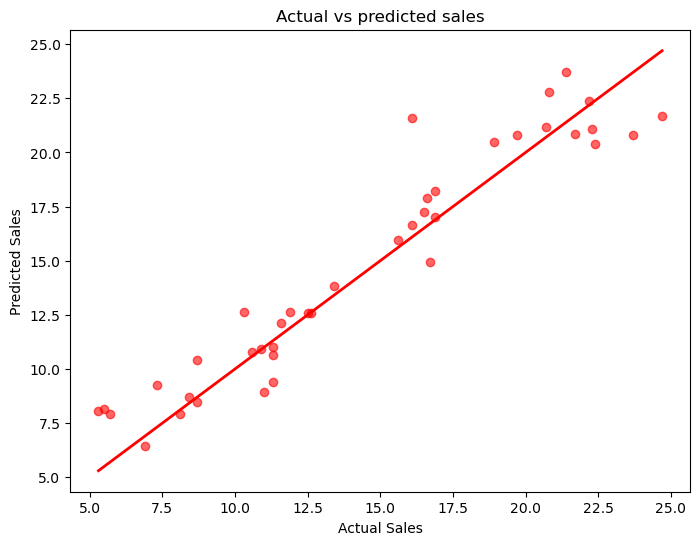

In [29]:
# Visualize the actual vs. predicted sales
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='red',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs predicted sales")
plt.show()

In [30]:
# Print model coefficients
coefficients=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


In [31]:
model.intercept_

4.714126402214134

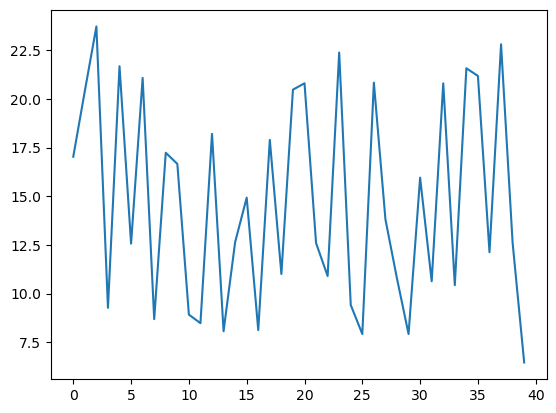

In [32]:
plt.plot(y_pred)

The project demonstrates that TV advertising is the most significant predictor of sales, enabling effective budget allocation for maximizing sales outcomes.